In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Učitavanje podataka

In [0]:
import nyutransforms as nyuT
import nyudepth as nyu
import torch.utils.data as data

transforms = nyuT.Compose([
    nyuT.ToPILImage(), 
    nyuT.RandomRotation((-5, 5)), 
    nyuT.Scale(1.0, 1.5), 
    nyuT.RandomHorizontalFlip(p=0.5), 
    nyuT.RandomCrop((228, 304),(480, 640)), 
    nyuT.ToTensor(), 
    nyuT.ColorTransformation((0.8, 1.2))
])

dataset = nyu.NYUDepthV2Dataset('/content/drive/My Drive/zavrsni/data/nyudata', transform=transforms)
dataloader = data.DataLoader(dataset, batch_size=16, shuffle=True)

In [0]:
import torch.optim as optim
import loss as L
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import mynn
import math
import torch.optim as opt


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = mynn.create_mynet()
net.to(device)
optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9, weight_decay=0.0005)
scheduler = opt.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)
berHu = L.ReverseHuberLoss()


with open('/content/drive/My Drive/zavrsni/epoch.txt', 'r') as f:
  last_epoch = int(f.read())

for epoch in range(20):
  if epoch is not 0:
    net.load_state_dict(torch.load('/content/drive/My Drive/zavrsni/nyu_netSGD3.pt'))
    print('net loaded from epoch %d.' % (epoch))
  
  if epoch > last_epoch:
    print('last_epoch -> %d, curr_epoch -> %d' % (last_epoch, epoch))
    for _ in range(8):
      for i, sample in enumerate(dataloader):
        inputs, depths = sample['image'], sample['depth']
        inputs, depths = inputs.to(device), depths.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        depths = F.interpolate(depths, size=(128, 160), mode='nearest')
        loss = berHu(depths, outputs, device)

        loss.backward()
        optimizer.step()

      print('epoch: %d > loss: %.9f' % (epoch, loss.item()))

    torch.save(net.state_dict(), '/content/drive/My Drive/zavrsni/nyu_netSGD3.pt')
    print('epoch %d is saved.' % (epoch))
    
    with open('/content/drive/My Drive/zavrsni/epoch.txt', 'w') as f:
      f.write(str(epoch))
  scheduler.step()
  print('lr=%f' % (optimizer.param_groups[0]['lr']))
  
print("Finished training")
torch.save(net.state_dict(), '/content/drive/My Drive/zavrsni/nyu_netSGD3.pt')


last_epoch -> -1, curr_epoch -> 0
epoch: 0 > loss: 2.531829596


Učenje

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
4.108776
5.9249086
(228, 304, 3)
(128, 160)
(480, 640)


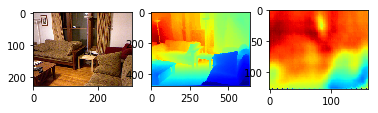

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
2.7523909
7.245267
(228, 304, 3)
(128, 160)
(480, 640)


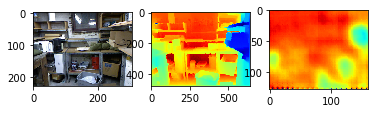

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
2.6695402
9.144393
(228, 304, 3)
(128, 160)
(480, 640)


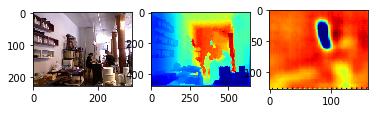

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
2.0373454
6.731547
(228, 304, 3)
(128, 160)
(480, 640)


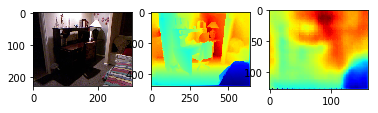

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
4.9982452
9.820208
(228, 304, 3)
(128, 160)
(480, 640)


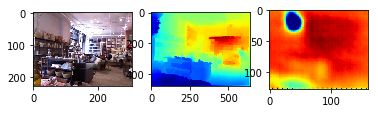

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
2.5662978
6.045979
(228, 304, 3)
(128, 160)
(480, 640)


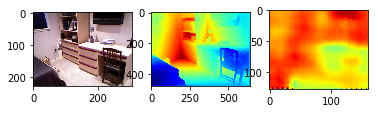

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
4.1800895
8.029474
(228, 304, 3)
(128, 160)
(480, 640)


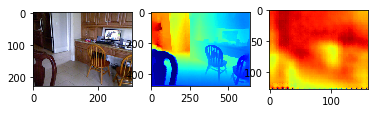

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
6.5668774
6.227803
(228, 304, 3)
(128, 160)
(480, 640)


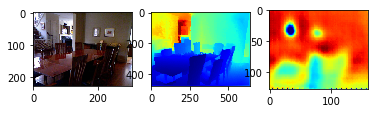

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
2.4199774
4.3233194
(228, 304, 3)
(128, 160)
(480, 640)


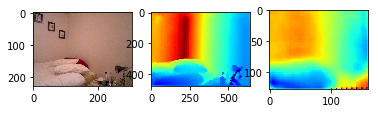

torch.Size([1, 3, 228, 304])
torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 128, 160])
2.3459923
4.1209292
(228, 304, 3)
(128, 160)
(480, 640)


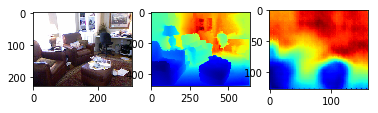

In [4]:
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import mynn

net = mynn.create_mynet()
net.load_state_dict(torch.load('/content/drive/My Drive/zavrsni/nyu_netSGD2.pt'))
net.eval()

transform = nyuT.Compose([nyuT.Transpose(),
                          nyuT.Downsample(),
                          nyuT.CenterCrop(),
                          nyuT.ToTensor()])
dataset = nyu.NYUDepthV2Dataset('/content/drive/My Drive/zavrsni/data/nyu_depth_v2_labeled.mat', transform=transform)
dataloader = data.DataLoader(dataset, batch_size=1, shuffle=True)

for i, sample in enumerate(dataloader):
  if i == 10:
    break
  
  image, depth = sample['image'], sample['depth']
  print(image.shape)
  print(depth.shape)
  output = net(image)
  print(output.shape)
  #output = F.interpolate(output, size=(480, 640), mode='bilinear')
  output = torch.reshape(output, (output.shape[0], output.shape[2], output.shape[3]))
  image = image[0].detach().numpy().transpose((1, 2, 0))
  depth = depth[0][0].detach().numpy()
  output = output[0].detach().numpy()
  print(depth[100][100])
  print(output[100][100])
  print(image.shape)
  print(output.shape)
  print(depth.shape)


  
  plt.subplot(1, 3, 1)
  plt.imshow(image)
  plt.subplot(1, 3, 2)
  plt.imshow(depth, cmap='jet')
  plt.subplot(1, 3, 3)
  plt.imshow(output, cmap='jet')
  plt.show()

In [0]:
with open('/content/drive/My Drive/zavrsni/epoch.txt', 'w') as f:
      f.write('-1')